In [ ]:

import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt




In [ ]:
img = cv.imread('./cat.jpg')

print(img)

In [ ]:
# 唔建議用以下呢個寫法，因為會出問題
cv.imshow("Picture",img)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
def show(img):
    rgb_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.show()

In [ ]:
show(img)

In [ ]:
copied_img = img.copy()

cut_portion = copied_img[200:400,400:800] 

copied_img[0:200,200:600] = cut_portion

show(copied_img)

In [ ]:
resized_img = cv.resize(img,(128,128),interpolation=cv.INTER_AREA)
show(resized_img)

In [ ]:
scale_ratio = 30
new_width = int(img.shape[1] * scale_ratio /100)
new_height = int(img.shape[0] * scale_ratio /100)

scaled_down_img = cv.resize(img,(new_width,new_height),interpolation=cv.INTER_AREA)
show(scaled_down_img)

In [ ]:
scale_ratio = 150
new_width = int(img.shape[1] * scale_ratio /100)
new_height = int(img.shape[0] * scale_ratio /100)

scaled_up_img = cv.resize(img,(new_width,new_height),interpolation=cv.INTER_CUBIC)
show(scaled_up_img)

In [ ]:
vertical_flipped_img = cv.flip(img,0)
horizontal_flipped_img = cv.flip(img,1)

show(vertical_flipped_img)
show(horizontal_flipped_img)

In [ ]:
counter_90_img = cv.rotate(img,cv.ROTATE_90_COUNTERCLOCKWISE)
show(counter_90_img)

In [ ]:
bilateral_image = cv.bilateralFilter(img,50,300,300)

show(bilateral_image)

In [ ]:
kernel = np.ones((2,2),np.uint8)

eroded_img = cv.erode(img,kernel)
show(eroded_img)

In [ ]:
kernel = np.ones((5,5),np.uint8)

dilated_img = cv.dilate(img,kernel)
show(dilated_img)

In [ ]:
eroded_dilated_img = cv.dilate(cv.erode(img,kernel),kernel)
show(eroded_dilated_img)

In [ ]:
kernel = np.ones((5,5),np.uint8)

morph_opened_img = cv.morphologyEx(img,cv.MORPH_OPEN,kernel)
show(morph_opened_img)
morph_closed_img = cv.morphologyEx(img,cv.MORPH_CLOSE,kernel)
show(morph_closed_img)

In [ ]:

blurred_img = cv.blur(img,(20,20))
show(blurred_img)
median_blurred_img = cv.medianBlur(img,21,21)
show(median_blurred_img)

In [ ]:
ret,threshold_image = cv.threshold(img,200,255,cv.THRESH_BINARY)
show(threshold_image)

In [ ]:
gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

plt.imshow(gray_img,cmap='gray', vmin=0, vmax=255)


In [ ]:
cv.imwrite('./cat_gray.jpg',gray_img)


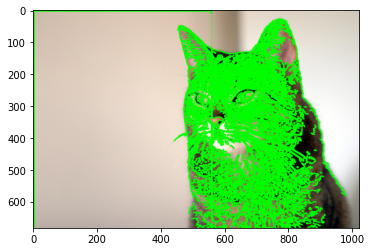

In [84]:


# ret,threshold_image = cv.threshold(img,160,255,cv.THRESH_BINARY)

cat_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

cat_img = cv.GaussianBlur(cat_img, (3, 3), 0)
cat_img = cv.Canny(cat_img, 50, 100)
# kernel = np.ones((10,10),np.uint8)
# morph_opened_img = cv.morphologyEx(cat_img,cv.MORPH_OPEN,kernel)

contours1, hierarchy1 = cv.findContours(image=cat_img,mode=cv.RETR_CCOMP, method=cv.CHAIN_APPROX_NONE)

contoured_img = img.copy()
cv.drawContours(image=contoured_img, 
    contours=contours1, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv.LINE_AA)

cv.imwrite('./contoured_cat.jpg',contoured_img)
show(contoured_img)

In [ ]:
# Read video
cap = cv.VideoCapture('./potus_3012.mp4')
print(cap.get(cv.CAP_PROP_FPS))

if cap.isOpened() == False:
    print("Failed to read video")

i = 0

while i < 20:
    ret, frame = cap.read()
    show(frame)
    i = i + 1



cap.release()